## Preprocessing the Adult Income Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.isnull().sum()  # Check for missing values


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native.country_Puerto-Rico', 'native.country_Scotland',
       'native.country_South', 'native.country_Taiwan',
       'native.country_Thailand', 'native.country_Trinadad&Tobago',
       'native.country_United-States', 'native.country_Vietnam',
       'native.country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)

In [13]:
X = df.drop('income_>50K', axis=1) 
y = df['income_>50K']


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##  Applying Cross-Validation to Random Forest Classifier

In [16]:

rf = RandomForestClassifier(random_state=42)


In [17]:
## Perform Cross-Validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation: {cv_scores.std()}')


## Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [18]:

estimators = [50, 100, 150]
learning_rates = [0.01, 0.1, 0.2]
results = {}

for n_estimators in estimators:
    for learning_rate in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb.fit(X_train, y_train)
        train_score = gb.score(X_train, y_train)
        test_score = gb.score(X_test, y_test)
        results[(n_estimators, learning_rate)] = (train_score, test_score)


In [19]:
##Evaluate for Overfitting and Underfitting:
for params, scores in results.items():
    print(f'Estimators: {params[0]}, Learning Rate: {params[1]}')
    print(f'Training Score: {scores[0]}, Testing Score: {scores[1]}')


Estimators: 50, Learning Rate: 0.01
Training Score: 0.804010179010179, Testing Score: 0.8057119459514792
Estimators: 50, Learning Rate: 0.1
Training Score: 0.861969111969112, Testing Score: 0.8564847988535162
Estimators: 50, Learning Rate: 0.2
Training Score: 0.871007371007371, Testing Score: 0.8647763332992118
Estimators: 100, Learning Rate: 0.01
Training Score: 0.8447700947700948, Testing Score: 0.8450199611014434
Estimators: 100, Learning Rate: 0.1
Training Score: 0.8702176202176202, Testing Score: 0.8655952502815027
Estimators: 100, Learning Rate: 0.2
Training Score: 0.8784222534222534, Testing Score: 0.8710205752891801
Estimators: 150, Learning Rate: 0.01
Training Score: 0.8457353457353457, Testing Score: 0.8449175964786569
Estimators: 150, Learning Rate: 0.1
Training Score: 0.8738153738153738, Testing Score: 0.8681543658511618
Estimators: 150, Learning Rate: 0.2
Training Score: 0.8834240084240085, Testing Score: 0.8721465861398301


## Evaluating Precision, Recall, and F1-Score for Random Forests

In [20]:

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print(report)


              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7429
        >50K       0.73      0.61      0.67      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



# Discuss the trade-offs between these metrics and their importance for classification tasks.

In classification tasks, precision, recall, and F1-score each address different aspects of model performance. Precision measures the accuracy of positive predictions, making it crucial when false positives are costly, such as in spam detection. Recall, on the other hand, focuses on capturing as many true positives as possible, which is vital when missing positives is more detrimental, like in medical diagnoses. The F1-score balances precision and recall, offering a single metric for scenarios with imbalanced classes or when both false positives and false negatives have significant consequences. Thus, choosing between these metrics depends on whether you prioritize minimizing false positives, maximizing the detection of positives, or finding a balance between the two.

## ROC Curve and AUC for Gradient Boosting Classifier

In [21]:

y_prob = gb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


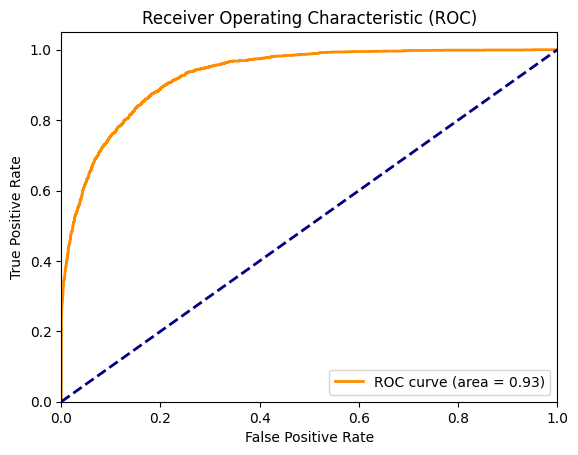

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Model Performance Comparison with Different Metrics

In [23]:

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8542327771522162
              precision    recall  f1-score   support

       False       0.88      0.93      0.91      7429
        True       0.73      0.61      0.67      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Gradient Boosting Accuracy: 0.8655952502815027
              precision    recall  f1-score   support

       False       0.88      0.95      0.92      7429
        True       0.80      0.58      0.68      2340

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

SVM Accuracy: 0.7939400143310472
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      7429
        True       0.99      0.14      0.25      2340

    accuracy                           0.79      9769
   ma